In [1]:
import pandas as pd
import numpy as np

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns


In [3]:
from scipy import stats

In [4]:
df = pd.read_csv('data/kc_house_data.csv')

In [7]:
df.shape

(21597, 21)

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21597 non-null  int64  
 1   date           21597 non-null  object 
 2   price          21597 non-null  float64
 3   bedrooms       21597 non-null  int64  
 4   bathrooms      21597 non-null  float64
 5   sqft_living    21597 non-null  int64  
 6   sqft_lot       21597 non-null  int64  
 7   floors         21597 non-null  float64
 8   waterfront     19221 non-null  float64
 9   view           21534 non-null  float64
 10  condition      21597 non-null  int64  
 11  grade          21597 non-null  int64  
 12  sqft_above     21597 non-null  int64  
 13  sqft_basement  21597 non-null  object 
 14  yr_built       21597 non-null  int64  
 15  yr_renovated   17755 non-null  float64
 16  zipcode        21597 non-null  int64  
 17  lat            21597 non-null  float64
 18  long  

In [11]:
df.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.159700e+04,2.159700e+04,21597.000000,21597.000000,21597.000000,2.159700e+04,21597.000000,19221.000000,21534.000000,21597.000000,21597.000000,21597.000000,21597.000000,17755.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000
mean,4.580474e+09,5.402966e+05,3.373200,2.115826,2080.321850,1.509941e+04,1.494096,0.007596,0.233863,3.409825,7.657915,1788.596842,1970.999676,83.636778,98077.951845,47.560093,-122.213982,1986.620318,12758.283512
std,2.876736e+09,3.673681e+05,0.926299,0.768984,918.106125,4.141264e+04,0.539683,0.086825,0.765686,0.650546,1.173200,827.759761,29.375234,399.946414,53.513072,0.138552,0.140724,685.230472,27274.441950
min,1.000102e+06,7.800000e+04,1.000000,0.500000,370.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,3.000000,370.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.220000e+05,3.000000,1.750000,1430.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,1951.000000,0.000000,98033.000000,47.471100,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,1975.000000,0.000000,98065.000000,47.571800,-122.231000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068500e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


In [12]:
df_nonreno = df[df.yr_renovated == 0]
df_nonreno = df_nonreno.dropna()
df_nonreno

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,...,7,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,...,8,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503
5,7237550310,5/12/2014,1230000.0,4,4.50,5420,101930,1.0,0.0,0.0,...,11,3890,1530.0,2001,0.0,98053,47.6561,-122.005,4760,101930
6,1321400060,6/27/2014,257500.0,3,2.25,1715,6819,2.0,0.0,0.0,...,7,1715,?,1995,0.0,98003,47.3097,-122.327,2238,6819
8,2414600126,4/15/2015,229500.0,3,1.00,1780,7470,1.0,0.0,0.0,...,7,1050,730.0,1960,0.0,98146,47.5123,-122.337,1780,8113
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21591,2997800021,2/19/2015,475000.0,3,2.50,1310,1294,2.0,0.0,0.0,...,8,1180,130.0,2008,0.0,98116,47.5773,-122.409,1330,1265
21592,263000018,5/21/2014,360000.0,3,2.50,1530,1131,3.0,0.0,0.0,...,8,1530,0.0,2009,0.0,98103,47.6993,-122.346,1530,1509
21593,6600060120,2/23/2015,400000.0,4,2.50,2310,5813,2.0,0.0,0.0,...,8,2310,0.0,2014,0.0,98146,47.5107,-122.362,1830,7200
21594,1523300141,6/23/2014,402101.0,2,0.75,1020,1350,2.0,0.0,0.0,...,7,1020,0.0,2009,0.0,98144,47.5944,-122.299,1020,2007


In [30]:
df_nonreno.shape

(15111, 21)

In [13]:
df_nonreno.corr()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
id,1.000000,-0.019465,0.007097,0.007804,-0.007594,-0.134346,0.022485,-0.008398,0.012040,-0.024300,0.009991,-0.008061,0.026072,NaN,-0.008831,-0.007977,0.023680,0.002282,-0.139994
price,-0.019465,1.000000,0.307928,0.522744,0.701402,0.091497,0.264053,0.260302,0.386576,0.043131,0.672643,0.614452,0.083286,NaN,-0.057259,0.316277,0.038935,0.589956,0.086435
bedrooms,0.007097,0.307928,1.000000,0.506927,0.575535,0.025864,0.174977,-0.005695,0.081118,0.023528,0.354523,0.474448,0.165070,NaN,-0.154801,-0.010892,0.138691,0.396733,0.027481
bathrooms,0.007804,0.522744,0.506927,1.000000,0.752816,0.082151,0.509361,0.055401,0.171119,-0.132837,0.666262,0.686312,0.547116,NaN,-0.214500,0.023911,0.241937,0.576540,0.084635
sqft_living,-0.007594,0.701402,0.575535,0.752816,1.000000,0.168654,0.358746,0.099673,0.277585,-0.063142,0.767830,0.877386,0.344146,NaN,-0.209618,0.053699,0.258069,0.766309,0.181810
sqft_lot,-0.134346,0.091497,0.025864,0.082151,0.168654,1.000000,-0.008924,0.026081,0.081135,-0.017598,0.112508,0.175708,0.051794,NaN,-0.127250,-0.081243,0.229797,0.143156,0.714278
floors,0.022485,0.264053,0.174977,0.509361,0.358746,-0.008924,1.000000,0.016491,0.018200,-0.269939,0.461631,0.528025,0.517599,NaN,-0.066657,0.055897,0.138710,0.284889,-0.011851
waterfront,-0.008398,0.260302,-0.005695,0.055401,0.099673,0.026081,0.016491,1.000000,0.380373,0.018080,0.080214,0.067363,-0.011777,NaN,0.027624,-0.010165,-0.034187,0.083152,0.027855
view,0.012040,0.386576,0.081118,0.171119,0.277585,0.081135,0.018200,0.380373,1.000000,0.050759,0.241473,0.162617,-0.040400,NaN,0.076227,0.006148,-0.066342,0.271901,0.074752
condition,-0.024300,0.043131,0.023528,-0.132837,-0.063142,-0.017598,-0.269939,0.018080,0.050759,1.000000,-0.153126,-0.164219,-0.398471,NaN,0.010200,-0.016412,-0.117018,-0.101823,-0.007540


<AxesSubplot:>

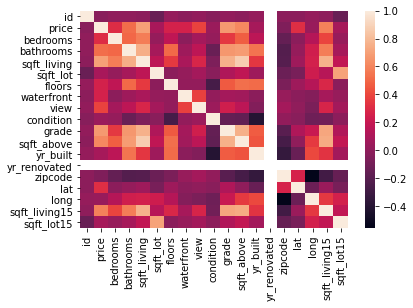

In [15]:
plt.figure
sns.heatmap(df_nonreno.corr())

<AxesSubplot:xlabel='grade', ylabel='yr_built'>

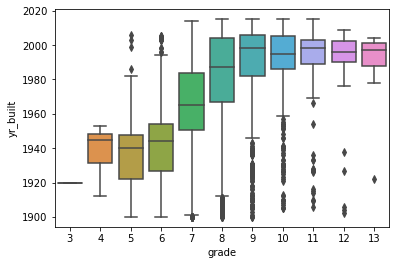

In [23]:
sns.boxplot(x = 'grade', y = 'yr_built', data = df_nonreno)

In [16]:
df_nonreno.sqft_basement.value_counts(normalize = True)

0.0       0.598769
?         0.020780
600.0     0.009662
500.0     0.009596
700.0     0.009397
            ...   
2090.0    0.000066
2010.0    0.000066
435.0     0.000066
1245.0    0.000066
225.0     0.000066
Name: sqft_basement, Length: 276, dtype: float64

In [17]:
for col in df_nonreno.columns:
    print(col)
    print(df_nonreno[col].value_counts(normalize = True, ascending = False).head(5))
    print ("-----------------------------------------------------------------")

id
5430300171    0.000132
6791200120    0.000132
705730280     0.000132
3333002450    0.000132
9353300600    0.000132
Name: id, dtype: float64
-----------------------------------------------------------------
date
6/25/2014    0.006485
6/23/2014    0.006419
7/8/2014     0.005824
4/27/2015    0.005824
4/28/2015    0.005757
Name: date, dtype: float64
-----------------------------------------------------------------
price
350000.0    0.008404
450000.0    0.007478
500000.0    0.007412
425000.0    0.007213
550000.0    0.006816
Name: price, dtype: float64
-----------------------------------------------------------------
bedrooms
3    0.454106
4    0.322546
2    0.126332
5    0.074184
6    0.011515
Name: bedrooms, dtype: float64
-----------------------------------------------------------------
bathrooms
2.50    0.258686
1.00    0.176362
1.75    0.141023
2.25    0.096354
2.00    0.085765
Name: bathrooms, dtype: float64
-----------------------------------------------------------------
sqft_livi

In [18]:
conts= []
cats= []

In [19]:
for col in df_nonreno.columns:
    if (df_nonreno[col].nunique() < 25):
        cats.append(col)
    else: 
        conts.append(col)

In [20]:
conts

['id',
 'date',
 'price',
 'bathrooms',
 'sqft_living',
 'sqft_lot',
 'sqft_above',
 'sqft_basement',
 'yr_built',
 'zipcode',
 'lat',
 'long',
 'sqft_living15',
 'sqft_lot15']

In [21]:
cats

['bedrooms',
 'floors',
 'waterfront',
 'view',
 'condition',
 'grade',
 'yr_renovated']

In [24]:
min_threshold, max_threshold = df_nonreno.price.quantile([0.25, 0.75])
min_threshold, max_threshold

(320000.0, 633000.0)

In [25]:
df_1 = df_nonreno[(df_nonreno.price < max_threshold) & (df_nonreno.price > min_threshold)]

In [28]:
df_1.shape

(7491, 21)

<AxesSubplot:>

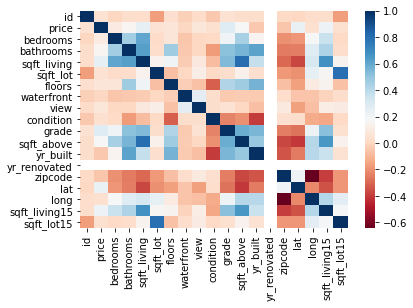

In [46]:
plt.figure
sns.heatmap(df_1.corr(), cmap = 'RdBu')

In [44]:
df_1.corr()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
id,1.000000,0.056659,0.004121,0.034639,0.025553,-0.165792,0.041959,-0.019392,0.021346,-0.040975,0.055619,0.036088,0.032661,NaN,0.015513,0.008391,0.029236,0.031739,-0.162911
price,0.056659,1.000000,0.106822,0.165318,0.252715,0.051296,0.072567,-0.000308,0.077546,0.045041,0.281128,0.176156,-0.041730,NaN,-0.049164,0.234602,0.045780,0.228901,0.049203
bedrooms,0.004121,0.106822,1.000000,0.462938,0.611186,0.019985,0.072695,-0.045818,0.010356,0.018067,0.215316,0.450016,0.158096,NaN,-0.193724,-0.184313,0.172703,0.363531,0.015273
bathrooms,0.034639,0.165318,0.462938,1.000000,0.631960,0.026258,0.471278,-0.044868,0.006186,-0.172729,0.515910,0.559817,0.620815,NaN,-0.244827,-0.243928,0.279400,0.434738,0.025692
sqft_living,0.025553,0.252715,0.611186,0.631960,1.000000,0.141918,0.214653,-0.027826,0.090265,-0.076437,0.542593,0.802842,0.371787,NaN,-0.293408,-0.369280,0.318971,0.677466,0.152762
sqft_lot,-0.165792,0.051296,0.019985,0.026258,0.141918,1.000000,-0.068592,0.011661,0.121254,0.014330,0.036533,0.135133,0.042272,NaN,-0.174618,-0.194775,0.255549,0.169207,0.796371
floors,0.041959,0.072567,0.072695,0.471278,0.214653,-0.068592,1.000000,-0.020436,-0.059037,-0.313417,0.426208,0.468134,0.568841,NaN,-0.069846,-0.160437,0.103144,0.149924,-0.062579
waterfront,-0.019392,-0.000308,-0.045818,-0.044868,-0.027826,0.011661,-0.020436,1.000000,0.263465,0.033927,-0.032874,-0.027224,-0.038149,NaN,0.025652,-0.055424,-0.052705,-0.012451,0.025637
view,0.021346,0.077546,0.010356,0.006186,0.090265,0.121254,-0.059037,0.263465,1.000000,0.033990,0.050730,0.009180,-0.067971,NaN,0.097219,-0.155009,-0.067612,0.119362,0.112582
condition,-0.040975,0.045041,0.018067,-0.172729,-0.076437,0.014330,-0.313417,0.033927,0.033990,1.000000,-0.231374,-0.197242,-0.397166,NaN,0.040403,0.027916,-0.123296,-0.140629,0.014900


<AxesSubplot:xlabel='zipcode', ylabel='price'>

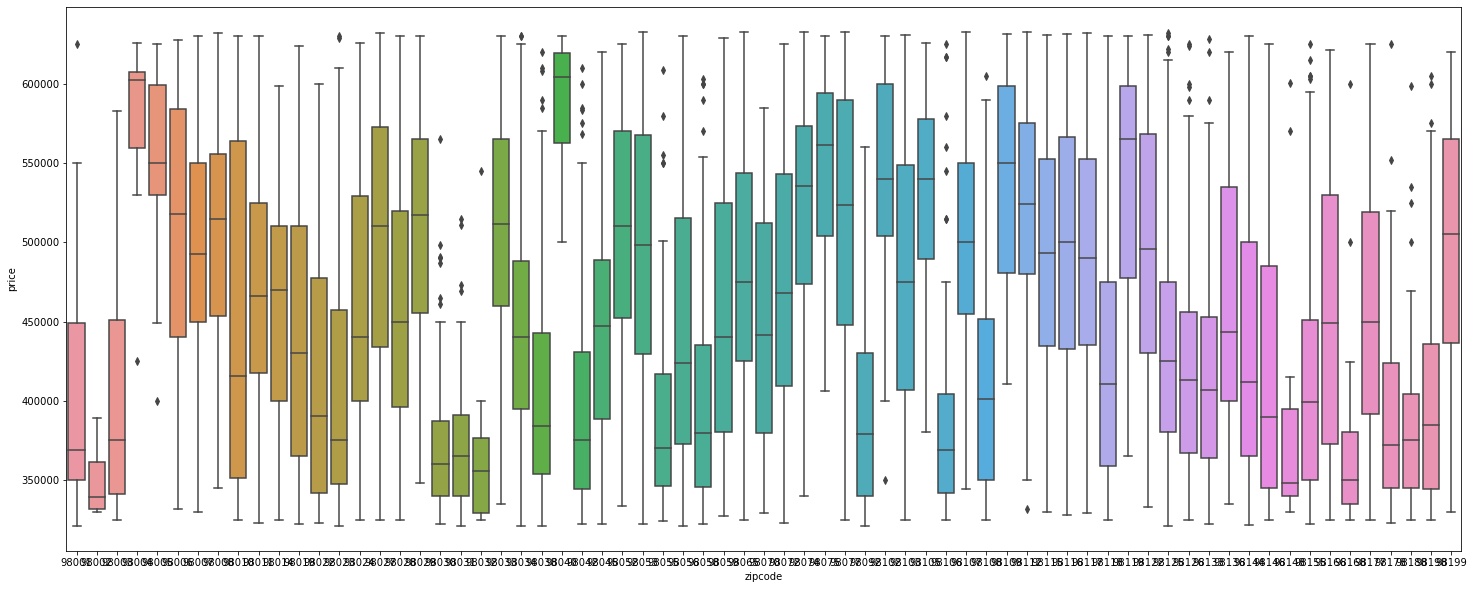

In [27]:
plt.figure(figsize=(25,10))
sns.boxplot(x = 'zipcode', y = 'price', data = df_1)


In [31]:
import statsmodels.api as sm
from statsmodels.formula.api import ols

In [32]:
outcome = "price"

In [35]:
x_cols = df_1.dropna().drop(["price", "sqft_basement", "id", "date", "sqft_above", "sqft_living15", "lat", "long", "sqft_lot"], axis = 1).columns

In [36]:
x_cols

Index(['bedrooms', 'bathrooms', 'sqft_living', 'floors', 'waterfront', 'view',
       'condition', 'grade', 'yr_built', 'yr_renovated', 'zipcode',
       'sqft_lot15'],
      dtype='object')

In [37]:
predictors = '+'.join(x_cols)

In [38]:
predictors

'bedrooms+bathrooms+sqft_living+floors+waterfront+view+condition+grade+yr_built+yr_renovated+zipcode+sqft_lot15'

In [39]:
f = outcome + '~' + predictors

In [40]:
f

'price~bedrooms+bathrooms+sqft_living+floors+waterfront+view+condition+grade+yr_built+yr_renovated+zipcode+sqft_lot15'

In [42]:
model = ols(formula = f, data= df_1).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.174
Model:                            OLS   Adj. R-squared:                  0.172
Method:                 Least Squares   F-statistic:                     142.8
Date:                Thu, 07 Jan 2021   Prob (F-statistic):          2.06e-299
Time:                        19:02:12   Log-Likelihood:                -95142.
No. Observations:                7491   AIC:                         1.903e+05
Df Residuals:                    7479   BIC:                         1.904e+05
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept     8.324e+06   2.05e+06      4.054      0.000     4.3e+06    1.23e+07
bedrooms     -6964.4441   1422.425     -4.896      0.000   -9752.797   -4176.091
bathrooms     1.977e+04   2289.673      8.635      0.000    1.53e+04    2.43e+04
sqft_living     19.2645      2.343      8.222      0.000      14.671      23.858
floors        1.169e+04   2137.174      5.468      0.000    7496.581    1.59e+04
waterfront   -6834.0603   2.39e+04     -0.286      0.775   -5.36e+04    3.99e+04
view          4064.9144   1816.421      2.238      0.025     504.219    7625.609
condition     3096.6506   1624.599      1.906      0.057     -88.020    6281.321
grade         3.584e+04   1577.302     22.722      0.000    3.27e+04    3.89e+04
yr_built     -1207.3666     50.463    -23.926      0.000   -1306.288   -1108.445
yr_renovated  7.262e-12    2.8e-12      2.595      0.009    1.78e-12    1.27e-11
zipcode        -59.5115     20.626     -2.885      0.004     -99.945     -19.078
sqft_lot15       0.0918      0.036      2.583      0.010       0.022       0.161
==============================================================================
Omnibus:                      553.405   Durbin-Watson:                   1.996
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              211.370
Skew:                           0.159   Prob(JB):                     1.26e-46
Kurtosis:                       2.241   Cond. No.                     1.86e+21
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 2.12e-29. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""